<a href="https://colab.research.google.com/github/AdityaMK15/machine-learning-lab/blob/main/1BM22CS015_LAB_4_Linear%26Multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

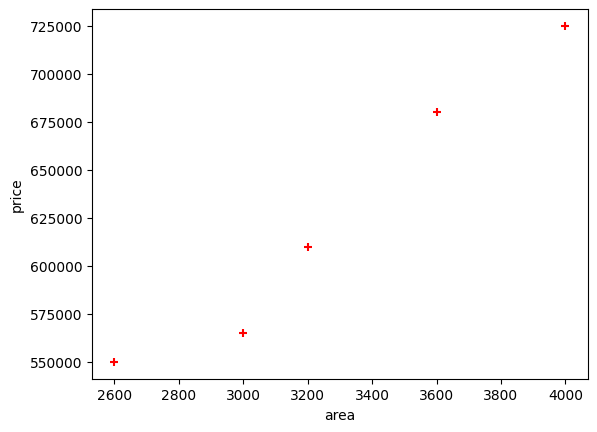

In [2]:


import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/housing_area_price.csv')


# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Predicted per capita income for Canada in 2020: 41027.67748165317


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


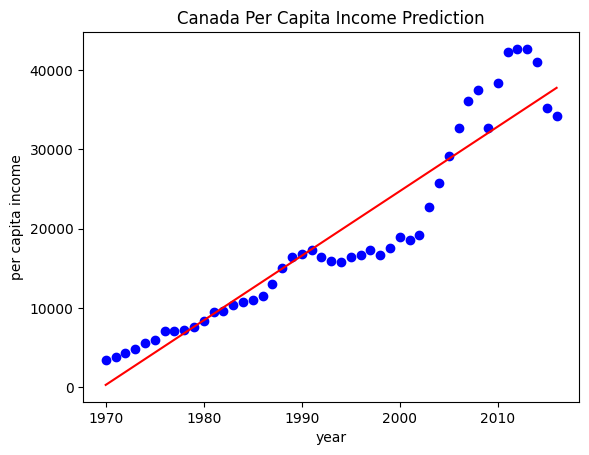

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Predicted salary for 12 years of experience: 140337.54125839565


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


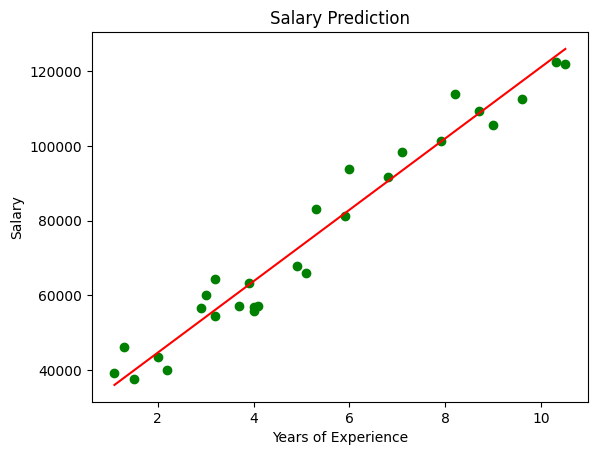

Mean Absolute Error for Canada Per Capita Income Prediction: 3240.91399747583
Mean Absolute Error for Salary Prediction: 4519.160622543313


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

canada_data = pd.read_csv('/content/canada_per_capita_income (1).csv')
print(canada_data.head())

canada_data = canada_data.dropna()
X_canada = canada_data[['year']]
y_canada = canada_data['per capita income (US$)']
X_train, X_test, y_train, y_test = train_test_split(X_canada, y_canada, test_size=0.2, random_state=42)

# Create and train the regression model
regressor_canada = LinearRegression()
regressor_canada.fit(X_train, y_train)

# Predict per capita income for 2020
income_2020 = regressor_canada.predict([[2020]])
print(f"Predicted per capita income for Canada in 2020: {income_2020[0]}")
plt.scatter(X_canada, y_canada, color='blue')
plt.plot(X_canada, regressor_canada.predict(X_canada), color='red')
plt.title('Canada Per Capita Income Prediction')
plt.xlabel('year')
plt.ylabel('per capita income')
plt.show()

# 2. Predict Salary of an Employee with 12 Years of Experience
salary_data = pd.read_csv('salary.csv')
print(salary_data.head())
salary_data = salary_data.dropna()
X_salary = salary_data[['YearsExperience']]
y_salary = salary_data['Salary']
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

# Create and train the regression model
regressor_salary = LinearRegression()
regressor_salary.fit(X_train_salary, y_train_salary)
predicted_salary = regressor_salary.predict([[12]])
print(f"Predicted salary for 12 years of experience: {predicted_salary[0]}")

plt.scatter(X_salary, y_salary, color='green')
plt.plot(X_salary, regressor_salary.predict(X_salary), color='red')
plt.title('Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Evaluate the models (optional)
y_pred_canada = regressor_canada.predict(X_test)
mae_canada = mean_absolute_error(y_test, y_pred_canada)
print(f"Mean Absolute Error for Canada Per Capita Income Prediction: {mae_canada}")

y_pred_salary = regressor_salary.predict(X_test_salary)
mae_salary = mean_absolute_error(y_test_salary, y_pred_salary)
print(f"Mean Absolute Error for Salary Prediction: {mae_salary}")

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

hiring_data = pd.read_csv('hiring.csv')
print(hiring_data.head())
hiring_data = hiring_data.dropna()

experience_mapping = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8,
    'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
}

hiring_data['experience'] = hiring_data['experience'].replace(experience_mapping)
hiring_data['experience'] = pd.to_numeric(hiring_data['experience'], errors='coerce')

if hiring_data['experience'].isnull().any():
    print("Warning: There are still non-numeric values in the 'experience' column.")
    hiring_data = hiring_data.dropna(subset=['experience'])

X_hiring = hiring_data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y_hiring = hiring_data['salary($)']

X_train_hiring, X_test_hiring, y_train_hiring, y_test_hiring = train_test_split(X_hiring, y_hiring, test_size=0.2, random_state=42)

regressor_hiring = LinearRegression()
regressor_hiring.fit(X_train_hiring, y_train_hiring)

candidate_1 = np.array([[2, 9, 6]])
candidate_2 = np.array([[12, 10, 10]])

salary_1 = regressor_hiring.predict(candidate_1)
salary_2 = regressor_hiring.predict(candidate_2)

print(f"Predicted salary for candidate 1 (2 yr experience, 9 test score, 6 interview score): {salary_1[0]}")
print(f"Predicted salary for candidate 2 (12 yr experience, 10 test score, 10 interview score): {salary_2[0]}")

companies_data = pd.read_csv('/content/1000_Companies (1).csv')
print(companies_data.head())
companies_data = companies_data.dropna()

label_encoder = LabelEncoder()
companies_data['State'] = label_encoder.fit_transform(companies_data['State'])

X_companies = companies_data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y_companies = companies_data['Profit']

X_train_companies, X_test_companies, y_train_companies, y_test_companies = train_test_split(X_companies, y_companies, test_size=0.2, random_state=42)

regressor_companies = LinearRegression()
regressor_companies.fit(X_train_companies, y_train_companies)

input_data = np.array([[91694.48, 515841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])
predicted_profit = regressor_companies.predict(input_data)

print(f"Predicted profit for the given inputs (Florida State): {predicted_profit[0]}")

y_pred_hiring = regressor_hiring.predict(X_test_hiring)
mae_hiring = mean_absolute_error(y_test_hiring, y_pred_hiring)
print(f"Mean Absolute Error for Salary Prediction: {mae_hiring}")

y_pred_companies = regressor_companies.predict(X_test_companies)
mae_companies = mean_absolute_error(y_test_companies, y_pred_companies)
print(f"Mean Absolute Error for Profit Prediction: {mae_companies}")

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
Predicted salary for candidate 1 (2 yr experience, 9 test score, 6 interview score): 56562.50000000001
Predicted salary for candidate 2 (12 yr experience, 10 test score, 10 interview score): 92562.49999999997
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901

<ipython-input-11-c7f4565f0971>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hiring_data['experience'] = hiring_data['experience'].replace(experience_mapping)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
